# Modelling of France Accidents

**Cohort:** mar23_accidents

**Author:** Tiago Russomanno

**Date:** 23 October 2023

### Radon forester with target variable severe



## Loading of required libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Importing the data

In [2]:
df = pd.read_csv('./data/231018_clean_table_for_analysis.csv', low_memory = False, index_col = 0)

## Data description
### Data

In [3]:
df.head()

place  catu  sexe  an_nais  trajet  locp    an  mois  jour  lum  \
Num_Acc                                                                         
201900000001    2.0     2     2     2002     0.0  -1.0  2019    11    30    4   
201900000001    1.0     1     2     1993     5.0  -1.0  2019    11    30    4   
201900000001    1.0     1     1     1959     0.0  -1.0  2019    11    30    4   
201900000002    1.0     1     2     1994     0.0  -1.0  2019    11    30    3   
201900000003    1.0     1     1     1996     0.0  -1.0  2019    11    28    1   

              ...  choc  manv        date  is_holiday  holiday  actp  num_veh  \
Num_Acc       ...                                                               
201900000001  ...   5.0  23.0  2019-11-30       False      NaN     0       14   
201900000001  ...   5.0  23.0  2019-11-30       False      NaN     0       14   
201900000001  ...   3.0  11.0  2019-11-30       False      NaN     0        0   
201900000002  ...   1.0   0.0  2019-11-30       False      NaN     0        0   
201900000003  ...   1.0   2.0  2019-11-28       False      NaN     1        0   

              hrmn  grav  etatp  
Num_Acc                          
201900000001    90     3      0  
201900000001    90     3      0  
201900000001    90     0      0  
201900000002   170     3      0  
201900000003   915     0      0  

[5 rows x 39 columns]

### Data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 39 columns):
 #   Column      Dtype  
---  ------      -----  
 0   place       float64
 1   catu        int64  
 2   sexe        int64  
 3   an_nais     int64  
 4   trajet      float64
 5   locp        float64
 6   an          int64  
 7   mois        int64  
 8   jour        int64  
 9   lum         int64  
 10  agg         int64  
 11  int         int64  
 12  atm         float64
 13  col         float64
 14  dep         int64  
 15  catr        float64
 16  circ        float64
 17  nbv         float64
 18  vosp        float64
 19  prof        float64
 20  plan        float64
 21  surf        float64
 22  infra       float64
 23  situ        float64
 24  senc        float64
 25  catv        int64  
 26  occutc      float64
 27  obs         float64
 28  obsm        float64
 29  choc        float64
 30  manv        float64
 31  date        object 
 32  is_holiday  bool

### Missing data

In [5]:
df.isna().sum()

place               0
catu                0
sexe                0
an_nais             0
trajet              0
locp                0
an                  0
mois                0
jour                0
lum                 0
agg                 0
int                 0
atm                 0
col                 0
dep                 0
catr                0
circ                0
nbv                 0
vosp                0
prof                0
plan                0
surf                0
infra               0
situ                0
senc                0
catv                0
occutc              0
obs                 0
obsm                0
choc                0
manv                0
date                0
is_holiday          0
holiday       2367768
actp                0
num_veh             0
hrmn                0
grav                0
etatp               0
dtype: int64

This data has no missing values, accept the `holiday` variable which contains the name of the holiday or NaN.

### Drop variables
The dataset contains still some variables that represent information represented by other variables or are a finer granulation. The latter might be added later, if the primary variable is relevant.

- `holiday`: classifies the holiday, but will be used only, if `is_holiday` is relevant

In [6]:
columns_drop = ['holiday']

df.drop(columns = columns_drop, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 38 columns):
 #   Column      Dtype  
---  ------      -----  
 0   place       float64
 1   catu        int64  
 2   sexe        int64  
 3   an_nais     int64  
 4   trajet      float64
 5   locp        float64
 6   an          int64  
 7   mois        int64  
 8   jour        int64  
 9   lum         int64  
 10  agg         int64  
 11  int         int64  
 12  atm         float64
 13  col         float64
 14  dep         int64  
 15  catr        float64
 16  circ        float64
 17  nbv         float64
 18  vosp        float64
 19  prof        float64
 20  plan        float64
 21  surf        float64
 22  infra       float64
 23  situ        float64
 24  senc        float64
 25  catv        int64  
 26  occutc      float64
 27  obs         float64
 28  obsm        float64
 29  choc        float64
 30  manv        float64
 31  date        object 
 32  is_holiday  bool

## Data preparation
### Transform data types
#### Date and time variables
The date and time variables are maybe important as grouping variables or as contrains for time dependent severity of accidents.

_Problem_:

Due to the export to `csv`, the `datatime` data time is lost and thus, it is required to assign it again.

**Steps:**
1. Transform `date` and `hrmn` to `datetime` type.nais` to integer and `date` to `date`.

In [8]:
# Fixing the hrmn issue:
# Transform `date`
df = df.assign(date = pd.to_datetime(df['date']))
df = df.assign(hrmn = pd.to_datetime(df['hrmn']))

In [9]:
df['date'] = df.apply(lambda x: int(x['date'].timestamp()), axis = 1)
df['hrmn'] = df.apply(lambda x: int(x['hrmn'].timestamp()), axis = 1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 38 columns):
 #   Column      Dtype  
---  ------      -----  
 0   place       float64
 1   catu        int64  
 2   sexe        int64  
 3   an_nais     int64  
 4   trajet      float64
 5   locp        float64
 6   an          int64  
 7   mois        int64  
 8   jour        int64  
 9   lum         int64  
 10  agg         int64  
 11  int         int64  
 12  atm         float64
 13  col         float64
 14  dep         int64  
 15  catr        float64
 16  circ        float64
 17  nbv         float64
 18  vosp        float64
 19  prof        float64
 20  plan        float64
 21  surf        float64
 22  infra       float64
 23  situ        float64
 24  senc        float64
 25  catv        int64  
 26  occutc      float64
 27  obs         float64
 28  obsm        float64
 29  choc        float64
 30  manv        float64
 31  date        int64  
 32  is_holiday  bool

#### Aggregation and encoding of the target variable
In the previous notebook, we used the `grav` variable as is without any further processing. The modelling result was not satisfying. Therefore, it was decided to aggregate the four classes into two classes "severe" and "non-severe" encoded in `[1,0]`.

In [11]:
# Encoding
df['severe'] = np.where(df['grav'].isin([0, 1]), 0, 1)

In [12]:
df.severe.unique()

array([1, 0])

The following visualisation shows the balance between the two classes. The dataset is much more balanced now compared to the four classes `grav`.

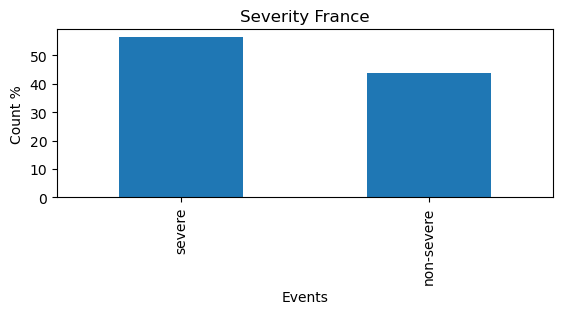

In [13]:
# checking the variables graphically and their distribution
import matplotlib.pyplot as plt
# exploring severe cases in % 
event_counts = df['severe'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
labels = ['severe','non-severe']
# Add labels and title to the plot
plt.xticks(range(len(event_counts)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity France')
# Display the plot
plt.show()

### Preparation of the training and test datasets
#### Split data
The dataset is split by year slides. We decided to drop the Covid-19 years 2020-21. The years 2005 to 2017 are selected for the train dataset and the years 2018 and 2019 for the test dataset. Furthermore, the `grav` variable is dropped because it is encoded in `severe`.


In [14]:
df.drop('grav', axis = 1, inplace = True)

In [15]:
# split the dataset to train and test data
X_train = df.loc[df['an'] < 2018]
X_train = X_train.drop('severe', axis = 1)

X_test = df[(df['an'] >= 2018) & (df['an'] < 2020)]
X_test = X_test.drop('severe', axis = 1)

y_train = df['severe'].loc[df['an'] < 2018]
y_test = df['severe'][(df['an'] >= 2018) & (df['an'] < 2020)]

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)


### Modelling the data using a Randon Forest classifier with 100 estimators

In [16]:
# run Randon Forest classifier for severe variable



from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = clf.predict(X_test)

# Get the accuracy score
acc = accuracy_score(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[Random Forest Algorithm] Accuracy Score: {:.3f}".format(acc))

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


[Random Forest Algorithm] Accuracy Score: 0.776
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.74    111446
           1       0.79      0.81      0.80    140377

    accuracy                           0.78    251823
   macro avg       0.77      0.77      0.77    251823
weighted avg       0.78      0.78      0.78    251823



In [17]:
from sklearn.metrics import confusion_matrix
#  confusion matrix
matrix = confusion_matrix(y_test, y_pred)  #y_test_preds

# Create a DataFrame from the confusion matrix
class_names = df.severe.values
dataframe = pd.DataFrame(matrix, index=['non-severe', 'severe'], 
                         columns=['severe-fatal', 'severe'])

# Display the confusion matrix as text
print("Confusion Matrix:")
print(dataframe)

Confusion Matrix:
            severe-fatal  severe
non-severe         81107   30339
severe             26164  114213


Length of feature_names: 37
Length of importances: 37


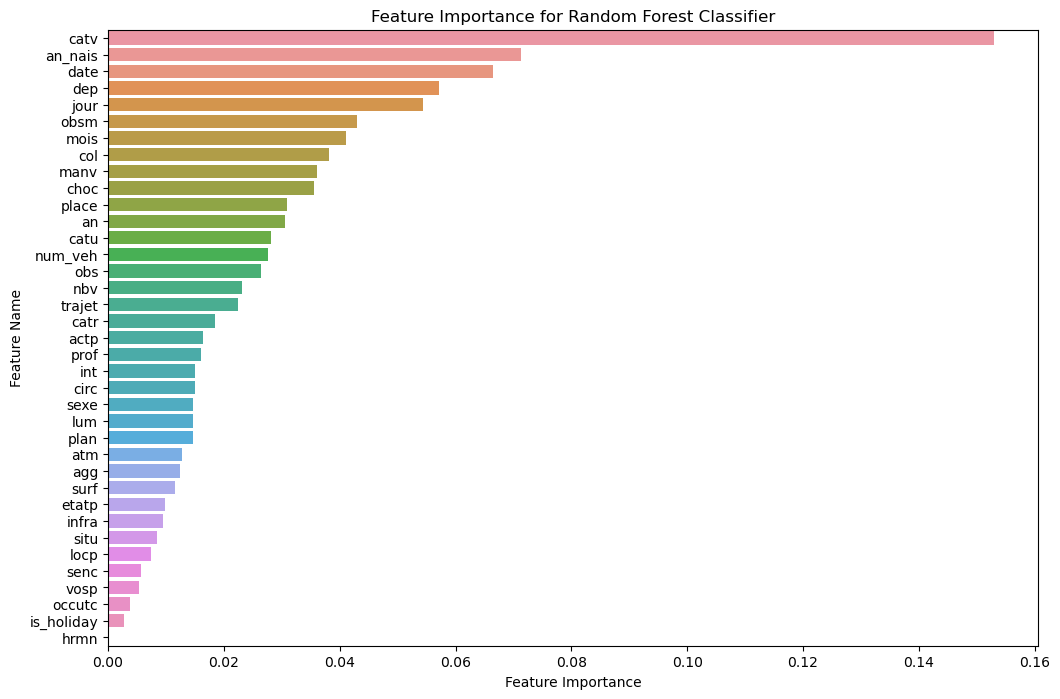

In [18]:
# estimate the feature impotance for the model
import numpy as np

# Access feature importances from the trained model
importances = clf.feature_importances_

feature_names = df.drop(columns=['severe']).columns.tolist()

# Check the lengths of feature_names and importances
print("Length of feature_names:", len(feature_names))
print("Length of importances:", len(importances))

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()

In [19]:
from sklearn.model_selection import KFold, cross_val_score
# Perform cross-validation with F1 score
f1_scores = cross_val_score(clf, X_train, y_train, scoring='f1_macro', cv=5, n_jobs=2)

# Print the F1 scores for each fold
print("F1 Scores (Cross-Validation):", f1_scores)

# Calculate and print the mean F1 score
mean_f1_score = f1_scores.mean()
print("Mean F1 Score (Cross-Validation):", mean_f1_score)

F1 Scores (Cross-Validation): [0.78999336 0.78604109 0.78857086 0.79189556 0.7834366 ]
Mean F1 Score (Cross-Validation): 0.7879874923427425


In [20]:
import joblib
joblib.dump(clf, 'random_forest_model_4b.pkl')

['random_forest_model_4b.pkl']